In this notebook, I will compare the predictions of sales price using various machine learning algorythms, i ncluding linear regression, knn, random ofrest.  

## <b>Importing and Preparing data

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset into a dataframe using pandas
df = pd.read_csv('dataset.csv')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [55]:
# Get a sense of the size of the datasest
df.shape

(1460, 81)

In [56]:
# Summarize columns with missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis = 0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis = 1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending = False).round(1)
        print ("There are " + str(mz_table.shape[0]) + " columns that have missing values.")
        return mz_table

missing_zero_values_table(df)

There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PoolQC,0,1453,99.5,1453,99.5,object
MiscFeature,0,1406,96.3,1406,96.3,object
Alley,0,1369,93.8,1369,93.8,object
Fence,0,1179,80.8,1179,80.8,object
FireplaceQu,0,690,47.3,690,47.3,object
LotFrontage,0,259,17.7,259,17.7,float64
GarageType,0,81,5.5,81,5.5,object
GarageYrBlt,0,81,5.5,81,5.5,float64
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object


In [57]:
# Drop columns containing less than 60% non-null values
df.dropna(thresh = df.shape[0]*0.6, how = 'all', inplace = True, axis=1)
df.shape

(1460, 76)

MasVnrArea_median value =  0.0


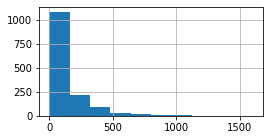

In [58]:
# Check the value distribution in MasVnrArea, which has 861 zero values.  
plt.figure(figsize=(4,2))
df['MasVnrArea'].hist()
print('MasVnrArea_median value = ', df['MasVnrArea'].median())

In [59]:
# Data in MasVnrArea column are largely zeros and unlikely to be useful.  Thus will be dropped.
df.drop(['MasVnrArea'], axis = 1, inplace = True)
missing_zero_values_table(df)

There are 13 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
LotFrontage,0,259,17.7,259,17.7,float64
GarageType,0,81,5.5,81,5.5,object
GarageYrBlt,0,81,5.5,81,5.5,float64
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object
GarageCond,0,81,5.5,81,5.5,object
BsmtExposure,0,38,2.6,38,2.6,object
BsmtFinType2,0,38,2.6,38,2.6,object
BsmtQual,0,37,2.5,37,2.5,object
BsmtCond,0,37,2.5,37,2.5,object


In [60]:
# Fill null values in LotFrontage column with the average value
df['LotFrontage'].fillna((df['LotFrontage'].mean()), inplace = True)
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The LotFrontage column has the most null value after dropping columns with more than 60% null values. Replacing NA values with the average did not change the mean for the column, thus it is a reasonable approach to preserve the column for later analysis.

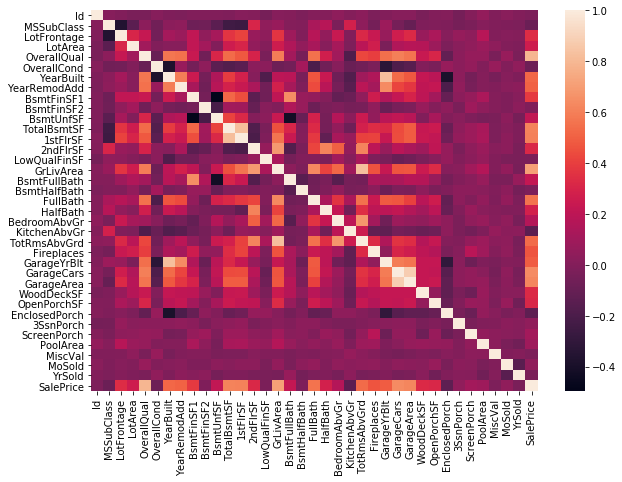

In [61]:
# Check correlations among columns
corr = df.corr()

# Plot heatmap for corr
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(corr)

Based on the heatmap, one can see that some fields correlate more with SalePrice than others.  
Examining the top 20 below

In [62]:
corr['SalePrice'].abs().sort_values(ascending = False).head(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64

Based on the above analysis, OverallQual column has the highest correlation coefficient (0.79) in relation to the SalePrice and it should be considered as the one best describes the SalesPrice field.

In [63]:
# Find highly correlated columns
s = corr.unstack()
so = s.sort_values(ascending = False)
so[so!=1].head(40)

GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
YearBuilt     GarageYrBlt     0.825667
GarageYrBlt   YearBuilt       0.825667
TotRmsAbvGrd  GrLivArea       0.825489
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
OverallQual   SalePrice       0.790982
SalePrice     OverallQual     0.790982
GrLivArea     SalePrice       0.708624
SalePrice     GrLivArea       0.708624
2ndFlrSF      GrLivArea       0.687501
GrLivArea     2ndFlrSF        0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFullBath  BsmtFinSF1      0.649212
BsmtFinSF1    BsmtFullBath    0.649212
GarageYrBlt   YearRemodAdd    0.642277
YearRemodAdd  GarageYrBlt     0.642277
SalePrice     GarageCars      0.640409
GarageCars    SalePrice       0.640409
FullBath      GrLivArea       0.630012
GrLivArea     FullBath        0.630012
GarageArea    SalePrice       0.623431
SalePrice     GarageArea 

Based on the values and description of the data, the first eight pairs are likely duplicate data. For example,
   GarageCars indicates the "Size of garage in car capacity" while GarageArea indicates the "Size of garage in square   feet", they are just different ways to measure the size of the garage.  
   The same is likely holds true for YearBuilt&GarageYrBlt, TotalBsmtSF&1stFlrSF, TotRmsAbvGrd&GrLivArea.  
   Continue down the list, 2ndFlrSF, BedroomAbvGr, BsmtFinSF1 are also likely to have similar information as their pairs.
   Based on this analysis, these columns will be dropped: ['GarageCars','GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd',2ndFlrSF, BedroomAbvGr, BsmtFinSF1]. 

In [64]:
df = df.drop(['GarageCars','GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd','2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1'], axis = 1)

In [65]:
# Check for missing values again
missing_zero_values_table(df)

There are 11 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
GarageType,0,81,5.5,81,5.5,object
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object
GarageCond,0,81,5.5,81,5.5,object
BsmtExposure,0,38,2.6,38,2.6,object
BsmtFinType2,0,38,2.6,38,2.6,object
BsmtQual,0,37,2.5,37,2.5,object
BsmtCond,0,37,2.5,37,2.5,object
BsmtFinType1,0,37,2.5,37,2.5,object
MasVnrType,0,8,0.5,8,0.5,object


Among the four columns related to Garage that still have missing values, "GarageType" refers to the Garage 
location, "GarageFinish" refers to the Interior finish of the garage, "GarageQual" refers to Garage quality,
"GarageCond" refers to Garage condition.  I concluded that "GarageCond" should be a sufficient parameter to evalute 
the garage condition. 

In [66]:
df = df.drop(['GarageType', 'GarageFinish', 'GarageQual'], axis = 1)

Among the five columns related to basement that still have missing values, "BsmtExposure" refers to walkout or 
garden level walls, "BsmtFinType2" is the rating of basement finished area (if multiple types), "BsmtQual" 
evaluates the height of the basement, "BsmtCond" evaluates the general condition of the basement, 
"BsmtFinType1" is the rating of basement finished area.  I concluded that "BsmtCond" should be a sufficient 
parameter to evalute the basement condition.

In [67]:
df = df.drop(['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1'], axis = 1)

In [68]:
# Check for missing values again
missing_zero_values_table(df)

There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
GarageCond,0,81,5.5,81,5.5,object
BsmtCond,0,37,2.5,37,2.5,object
MasVnrType,0,8,0.5,8,0.5,object
Electrical,0,1,0.1,1,0.1,object


Since the total missing values now only comprised of less than 10% of the total data, I decided to preserve the features and drop the rows containing missing values.

In [69]:
df.dropna(inplace = True)

# Check for missing values again
missing_zero_values_table(df)

There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [70]:
df.shape

(1340, 61)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   MSSubClass     1340 non-null   int64  
 2   MSZoning       1340 non-null   object 
 3   LotFrontage    1340 non-null   float64
 4   LotArea        1340 non-null   int64  
 5   Street         1340 non-null   object 
 6   LotShape       1340 non-null   object 
 7   LandContour    1340 non-null   object 
 8   Utilities      1340 non-null   object 
 9   LotConfig      1340 non-null   object 
 10  LandSlope      1340 non-null   object 
 11  Neighborhood   1340 non-null   object 
 12  Condition1     1340 non-null   object 
 13  Condition2     1340 non-null   object 
 14  BldgType       1340 non-null   object 
 15  HouseStyle     1340 non-null   object 
 16  OverallQual    1340 non-null   int64  
 17  OverallCond    1340 non-null   int64  
 18  YearBuil

In [72]:
# check the total number of missing values in the DataFrame again
df.isnull().values.sum()

0

### Make a copy of df

In [73]:
backdf = df.copy()

I decided to hand pick potential useful features and exclude features that may contain reducant information based on the data description.  I will also exclude features that are not likely to be important for home buyers based on my own intuiation.

In [74]:
s_col = ['MSSubClass', 'MSZoning','LotFrontage','LotArea','LandSlope','Neighborhood','OverallQual','YearBuilt','YearRemodAdd','BsmtCond','GrLivArea','FullBath','HalfBath','KitchenQual','Fireplaces','GarageArea','GarageCond','YrSold', 'SalePrice']
df = df[s_col]
print(df.shape)

(1340, 19)


YearBuilt, YearRemodAdd and YrSold alone are not as useful.  It's better to make a new column with information on
the age of the house.  If it is remodeled, the age will be calculated as from the year it was remodeled to the 
year it was sold.  

In [75]:
# Check to make sure that the dates make sense. 
c = df['YearRemodAdd'] >= df['YearBuilt']
c.value_counts()

True    1340
dtype: int64

In [76]:
# Create a new HouseAge column based on YearRemodAdd and YrSold
c = df['YearRemodAdd'] - df['YearBuilt']
df['HouseAge'] = c
df = df.drop(['YearBuilt', 'YearRemodAdd'], axis = 1)
df.shape

(1340, 18)

In [77]:
# Check feature correlation with sales price
corr = df.corr()
corr['SalePrice'].abs().sort_values(ascending = False)

SalePrice      1.000000
OverallQual    0.783738
GrLivArea      0.711424
GarageArea     0.608110
FullBath       0.569488
Fireplaces     0.445613
LotFrontage    0.328168
HalfBath       0.257160
LotArea        0.254615
HouseAge       0.202945
MSSubClass     0.080331
YrSold         0.019667
Name: SalePrice, dtype: float64

In [78]:
# MSSubClass is poorly correlated with SalePrice, will drop it
df = df.drop(['MSSubClass'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1340 non-null   object 
 1   LotFrontage   1340 non-null   float64
 2   LotArea       1340 non-null   int64  
 3   LandSlope     1340 non-null   object 
 4   Neighborhood  1340 non-null   object 
 5   OverallQual   1340 non-null   int64  
 6   BsmtCond      1340 non-null   object 
 7   GrLivArea     1340 non-null   int64  
 8   FullBath      1340 non-null   int64  
 9   HalfBath      1340 non-null   int64  
 10  KitchenQual   1340 non-null   object 
 11  Fireplaces    1340 non-null   int64  
 12  GarageArea    1340 non-null   int64  
 13  GarageCond    1340 non-null   object 
 14  YrSold        1340 non-null   int64  
 15  SalePrice     1340 non-null   int64  
 16  HouseAge      1340 non-null   int64  
dtypes: float64(1), int64(10), object(6)
memory usage: 188.4+ KB


In [79]:
df.shape

(1340, 17)

#### Transforming categorical variables

In [80]:
# Learn about the non-numeric variables
s_cols = df.select_dtypes(include=['object']).columns
s_cols

Index(['MSZoning', 'LandSlope', 'Neighborhood', 'BsmtCond', 'KitchenQual',
       'GarageCond'],
      dtype='object')

In [81]:
df.MSZoning.head(10)

0    RL
1    RL
2    RL
3    RL
4    RL
5    RL
6    RL
7    RL
8    RM
9    RL
Name: MSZoning, dtype: object

In [82]:
# Convertinglabels to numeric values
for col in s_cols:
    labels = df[col].astype('category').cat.categories.tolist()
    replace_map_comp = {col : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    df.replace(replace_map_comp, inplace=True)
    
print(df.head())

   MSZoning  LotFrontage  LotArea  LandSlope  Neighborhood  OverallQual  \
0         4         65.0     8450          1             6            7   
1         4         80.0     9600          1            25            6   
2         4         68.0    11250          1             6            7   
3         4         60.0     9550          1             7            7   
4         4         84.0    14260          1            16            8   

   BsmtCond  GrLivArea  FullBath  HalfBath  KitchenQual  Fireplaces  \
0         4       1710         2         1            3           0   
1         4       1262         2         0            4           1   
2         4       1786         2         1            3           1   
3         2       1717         1         0            3           1   
4         4       2198         2         1            3           1   

   GarageArea  GarageCond  YrSold  SalePrice  HouseAge  
0         548           5    2008     208500         0  
1       

In [83]:
df.shape

(1340, 17)

In [84]:
df.MSZoning.value_counts()

4    1068
5     191
2      62
3      11
1       8
Name: MSZoning, dtype: int64

In [85]:
df.head(3)

,MSZoning,LotFrontage,LotArea,LandSlope,Neighborhood,OverallQual,BsmtCond,GrLivArea,FullBath,HalfBath,KitchenQual,Fireplaces,GarageArea,GarageCond,YrSold,SalePrice,HouseAge
0,4,65.0,8450,1,6,7,4,1710,2,1,3,0,548,5,2008,208500,0
1,4,80.0,9600,1,25,6,4,1262,2,0,4,1,460,5,2007,181500,0
2,4,68.0,11250,1,6,7,4,1786,2,1,3,1,608,5,2008,223500,1


Text(0, 0.5, 'numbers sold')

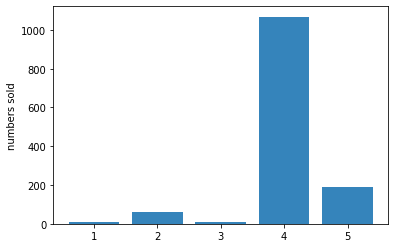

In [86]:
nh_count = df['MSZoning'].value_counts()
plt.bar(nh_count.index, nh_count.values, alpha=0.9)
plt.ylabel('numbers sold')

Text(0, 0.5, 'numbers sold')

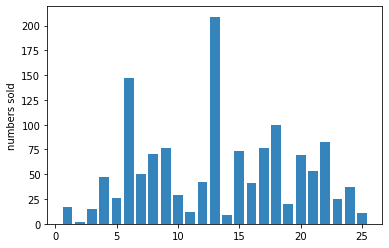

In [87]:
nh_count = df['Neighborhood'].value_counts()
plt.bar(nh_count.index, nh_count.values, alpha=0.9)
plt.ylabel('numbers sold')

In [88]:
# Check correlation again
corr = df.corr()
cor = corr['SalePrice'].abs().sort_values(ascending = False)
cor

SalePrice       1.000000
OverallQual     0.783738
GrLivArea       0.711424
KitchenQual     0.616826
GarageArea      0.608110
FullBath        0.569488
Fireplaces      0.445613
LotFrontage     0.328168
HalfBath        0.257160
LotArea         0.254615
HouseAge        0.202945
Neighborhood    0.199912
MSZoning        0.163753
GarageCond      0.148023
BsmtCond        0.061846
LandSlope       0.061369
YrSold          0.019667
Name: SalePrice, dtype: float64

In [89]:
# drop ['BsmtCond', 'LandSlope','YrSold'] columns

df = df.drop(['BsmtCond', 'LandSlope','YrSold'], axis = 1)
df.shape

(1340, 14)

## <b>Predicting sales price using linear regression  

In [114]:
from sklearn.utils import shuffle
import numpy as np
from sklearn.metrics import mean_squared_error 
from sklearn import linear_model

df = shuffle(df)
df.reset_index(inplace = True, drop = True)

In [115]:
# Define a function to run model fitting, prediction and checking errors automatically

def train_and_test(train, features):
    """ This function trains a model based on a set of given features using a training data set, 
    making prediction using the testing data set, and returns the rmse. """
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'], predictions)
    rmse = np.sqrt(mse)
    return predictions, rmse

In [116]:
df.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual', 'Fireplaces',
       'GarageArea', 'GarageCond', 'SalePrice', 'HouseAge'],
      dtype='object')

In [117]:
# Arbitrarily split data into train and test data sets based on 75:25 traian:test split.

sp = int(df.shape[0]*0.75)
train = df[:sp]
test = df[sp:]

features-used = 1, RMSE=82905.45035516428
features-used = 2, RMSE=76071.35669162756
features-used = 3, RMSE=77808.06187676896
features-used = 4, RMSE=78080.35719381999
features-used = 5, RMSE=50105.81012509729
features-used = 6, RMSE=43383.477739930946
features-used = 7, RMSE=43402.28272535868
features-used = 8, RMSE=43374.85916345796
features-used = 9, RMSE=40486.97474843866
features-used = 10, RMSE=40361.55700659273
features-used = 11, RMSE=38973.8447169068
features-used = 12, RMSE=38959.85448267872
features-used = 13, RMSE=38598.420605811676


Text(0, 0.5, 'rmse')

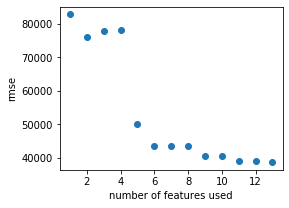

In [118]:
# find out the relationship between the nubmer of features used and the model accuracy

rmses = {}
features = ['MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual', 'Fireplaces',
       'GarageArea', 'GarageCond', 'HouseAge']
for i in range(1,len(features)+1):
    t_col = features[0:i]
    predictions, rmse = train_and_test(train,t_col)
    rmses[i] = rmse
    print(f"features-used = {i}, RMSE={rmse}")
    
# converting the rmses dictionary to a dataframe
rms = pd.DataFrame(list(rmses.items()), columns = ['n_cols', 'rmse'])

# plot the rmses verses the corresponsing number of features
plt.figure(figsize =(4,3))
plt.scatter(x = rms['n_cols'], y = rms['rmse'])
plt.xlabel('number of features used')
plt.ylabel('rmse')

Acuracy increases as the number of features used increases.  However, larger improvement occurred when the number of features increased from 4 to 6, and another smaller improvement when the number of features increased from 6 to 9.  

Text(0.5, 0, 'folds split')

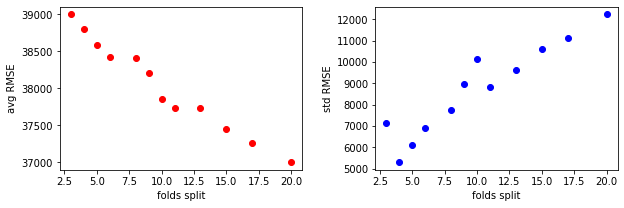

In [119]:
# Use k-fold cross-validation method to deterine the best way to split data for training.  

from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 4, 5, 6, 8, 9, 10, 11, 13, 15, 17, 20]
rmses_ls = []
std_rmse_ls = []

for fold in num_folds:
    kf = KFold(fold, shuffle = True, random_state = 1)
    lr = linear_model.LinearRegression()
    mses = cross_val_score(lr, df[features], df['SalePrice'], scoring = 'neg_mean_squared_error', cv = kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    rmses_ls.append(avg_rmse)
    std_rmse = np.std(rmses)
    std_rmse_ls.append(std_rmse)
    
fig = plt.figure(figsize = (10,3))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(num_folds, rmses_ls, color = 'red', label='avg_rmse')
ax1.set_ylabel('avg RMSE')
ax1.set_xlabel('folds split')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(num_folds, std_rmse_ls, color = 'blue', label='std_rmse')
ax2.set_ylabel('std RMSE')
ax2.set_xlabel('folds split')

To minimize rmse and the standard error of rmse, 10-fold split of data looks like a good choice.

In [120]:
import statistics 
print(f'min_rmse = {round(min(rmses_ls),3)}')
print(f'max_rmse = {round(max(rmses_ls),3)}')
print(f'overall_rmse = {round(statistics.mean(rmses_ls),3)}')
print(f'average housing price = {round(df.SalePrice.mean(),3)}')
print(f'overall_rmse/average housing price = {round(statistics.mean(rmses_ls)/df.SalePrice.mean(), 3)}')

min_rmse = 36998.308
max_rmse = 39001.211
overall_rmse = 38034.573
average housing price = 186838.631
overall_rmse/average housing price = 0.204


In [121]:
# Split data into train and test data sets using a 90:10 traian:test split.

sp = int(df.shape[0]*0.9)
train = df[:sp]
test = df[sp:]
print(train.shape)
print(test.shape)

(1206, 14)
(134, 14)


In [122]:
# Use separate function to train model with train data then predicting using either the testing data or the train data.  

def train_train(train, features):
    """ This function trains a model using a train data set and making prediction 
    using the train data set, and returns the predicted values and rmse.  """
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    tr_predictions = lr.predict(train[features])
    mse = mean_squared_error(train['SalePrice'], tr_predictions)
    rmse = np.sqrt(mse)
    return tr_predictions, rmse

def train_test(train, features):
    """ This function trains a model using a train data set and making prediction 
    using the test data set, and returns the predicted values and rmse.  """
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    te_predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'], te_predictions)
    rmse = np.sqrt(mse)
    return te_predictions, rmse

### Comparing predicted results using different number of features

In [123]:
# Using 4 features
tr_predictions4, tr_rmse4 = train_train(train, features[0:4])
te_predictions4, te_rmse4 = train_test(train, features[0:4])

# Using 6 features
tr_predictions6, tr_rmse6 = train_train(train, features[0:6])
te_predictions6, te_rmse6 = train_test(train, features[0:6])

# Using 10 features
tr_predictions10, tr_rmse10 = train_train(train, features[0:10])
te_predictions10, te_rmse10 = train_test(train, features[0:10])

# Using 13 features
tr_predictions13, tr_rmse13 = train_train(train, features[0:13])
te_predictions13, te_rmse13 = train_test(train, features[0:13])

print(f'rmse using 4 features and train data= {round(tr_rmse4, 3)}')
print(f'rmse using 4 features and test data= {round(te_rmse4, 3)}', '\n')
print(f'rmse using 6 features and train data= {round(tr_rmse6, 3)}')
print(f'rmse using 6 features and test data= {round(te_rmse6, 3)}', '\n')
print(f'rmse using 10 features and train data= {round(tr_rmse10, 3)}')
print(f'rmse using 10 features and test data= {round(te_rmse10, 3)}', '\n')
print(f'rmse using 13 features and train data= {round(tr_rmse13, 3)}')
print(f'rmse using 13 features and test data= {round(te_rmse13, 3)}')

rmse using 4 features and train data= 71672.337
rmse using 4 features and test data= 72531.166 

rmse using 6 features and train data= 41909.769
rmse using 6 features and test data= 36249.752 

rmse using 10 features and train data= 39851.594
rmse using 10 features and test data= 33221.487 

rmse using 13 features and train data= 38383.156
rmse using 13 features and test data= 30970.996


slope using 4 features = 0.158
slope using 6 features = 0.735
slope using 10 features = 0.768
slope using 13 features = 0.803 



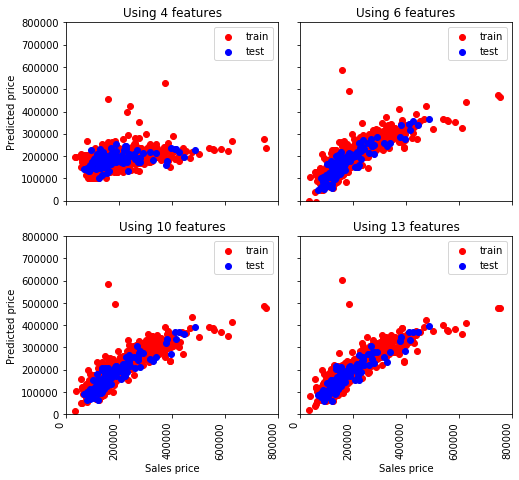

In [124]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(8,8), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.autofmt_xdate(rotation=90)
                  
ax1.scatter(train.SalePrice,  tr_predictions4, color = 'red', label='train')
ax1.scatter(test.SalePrice,  te_predictions4, color = 'blue', label = 'test')
ax1.set_ylabel('Predicted price')
ax1.set_xlim(0,800000)
ax1.set_ylim(0,800000)
ax1.title.set_text('Using 4 features')
ax1.legend(loc='upper right')
m, b = np.polyfit(test.SalePrice,  te_predictions4, 1)
print(f'slope using 4 features = {round(m, 3)}')

ax2.scatter(train.SalePrice,  tr_predictions6, color = 'red', label='train')
ax2.scatter(test.SalePrice,  te_predictions6, color = 'blue',label = 'test')
ax2.title.set_text('Using 6 features')
ax2.legend(loc='upper right')
m, b = np.polyfit(test.SalePrice,  te_predictions6, 1)
print(f'slope using 6 features = {round(m, 3)}')

ax3.scatter(train.SalePrice,  tr_predictions10, color = 'red', label='train')
ax3.scatter(test.SalePrice,  te_predictions10, color = 'blue',label = 'test')
ax3.set_xlabel('Sales price')
ax3.set_ylabel('Predicted price')
ax3.set_xlim(0,800000)
ax3.set_ylim(0,800000)
ax3.title.set_text('Using 10 features')
ax3.legend(loc='upper right')
m, b = np.polyfit(test.SalePrice,  te_predictions10, 1)
print(f'slope using 10 features = {round(m, 3)}')

ax4.scatter(train.SalePrice,  tr_predictions13, color = 'red', label='train')
ax4.scatter(test.SalePrice,  te_predictions13, color = 'blue',label = 'test')
ax4.set_xlabel('Sales price')
ax4.title.set_text('Using 13 features')
ax4.legend(loc='upper right')
m, b = np.polyfit(test.SalePrice,  te_predictions13, 1)
print(f'slope using 13 features = {round(m, 3)}', '\n')

handles, labels = ax1.get_legend_handles_labels()


As expected, using only four features resutled in poor performance even when using the training data for prediction.  Increasing the numbers of features increased the performance.  The best slope value for predicted price ploted against sales price is 0.772 with 13 features used.  It can also be seen that the predictions using the train data and test data are reasonability overlaped each other except at higher prices, indicating no obvious overfitting or underfitting of the model. 

## <b>Predicting sales price using knn

In [125]:
print(df.columns)
print(train.shape)
print(test.shape)

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual', 'Fireplaces',
       'GarageArea', 'GarageCond', 'SalePrice', 'HouseAge'],
      dtype='object')
(1206, 14)
(134, 14)


In [126]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, k):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train[train_col], train[target_col])
    prediction = knn.predict(test[train_col])
    mse = mean_squared_error(test[target_col], prediction)
    rmse = np.sqrt(mse)
    return prediction, rmse

Text(0, 0.5, 'rmse')

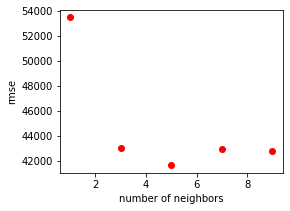

In [127]:
rmses_ls = []
prediction_ls = []
for k in [1, 3, 5, 7, 9]:
    prediction, rmse = knn_train_test(features, 'SalePrice', k)
    rmses_ls.append(rmse)
    prediction_ls.append(prediction)
       
plt.figure(figsize=(4,3))    
plt.scatter([1, 3, 5, 7, 9], rmses_ls, color ='red', label='losses')
plt.xlabel('number of neighbors')
plt.ylabel('rmse')

slope by knn prediction using 9 neighbors = 0.629
slope using LG with 10 features = 0.768 



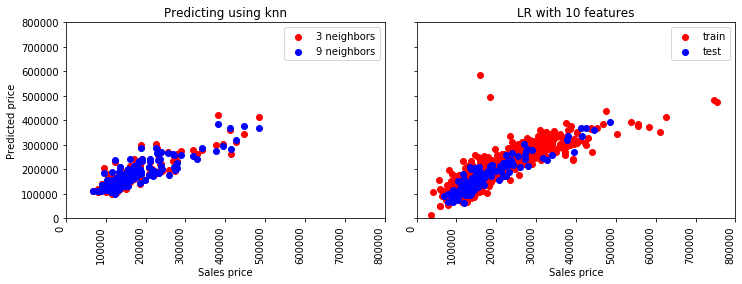

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.autofmt_xdate(rotation=90)
                  
ax1.scatter(test.SalePrice,  prediction_ls[2], color = 'red', label='3 neighbors')
ax1.scatter(test.SalePrice,  prediction_ls[4], color = 'blue', label='9 neighbors')
ax1.set_xlabel('Sales price')
ax1.set_ylabel('Predicted price')
ax1.set_xlim(0,800000)
ax1.set_ylim(0,800000)
ax1.title.set_text('Predicting using knn')
ax1.legend(loc='upper right')
m, b = np.polyfit(test.SalePrice,  prediction_ls[4], 1)
print(f'slope by knn prediction using 9 neighbors = {round(m, 3)}')

ax2.scatter(train.SalePrice,  tr_predictions10, color = 'red', label='train')
ax2.scatter(test.SalePrice,  te_predictions10, color = 'blue',label = 'test')
ax2.set_xlabel('Sales price')
ax2.title.set_text('LR with 10 features')
ax2.legend(loc='upper right')
m, b = np.polyfit(test.SalePrice,  te_predictions10, 1)
print(f'slope using LG with 10 features = {round(m, 3)}', '\n')

## <b>Predicting sales price using random forest

In [129]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[features], train['SalePrice'])
predictions = reg.predict(test[features])
mse = mean_squared_error(test['SalePrice'], prediction)
rmse_rf = np.sqrt(mse)
print(f'rmse = {rmse_rf}')

rmse = 42789.25734196292


slope by random forest = 0.883
slope using LG with 10 features = 0.768 



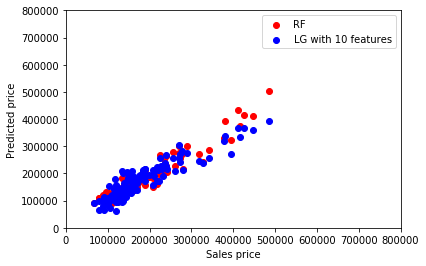

In [130]:
plt.scatter(test.SalePrice,  predictions, color='red',label='RF')
m, b = np.polyfit(test.SalePrice,  predictions, 1)
print(f'slope by random forest = {round(m, 3)}')

plt.scatter(test.SalePrice,  te_predictions10, color = 'blue',label = 'LG with 10 features')
plt.xlabel('Sales price')
plt.ylabel('Predicted price')
plt.xlim(0,800000)
plt.ylim(0,800000)
plt.legend()
m, b = np.polyfit(test.SalePrice,  te_predictions10, 1)
print(f'slope using LG with 10 features = {round(m, 3)}', '\n')

## <b>Prediction using decision tree

In [131]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(min_samples_leaf = 5)
reg.fit(train[features], train['SalePrice'])
prediction = reg.predict(test[features])
mse = mean_squared_error(test['SalePrice'], prediction)
rmse_dt = np.sqrt(mse)
print(f'rmse = {rmse_dt}')

rmse = 31313.273447070907


slope by decision tree = 0.899
slope using LG with 10 features = 0.768 



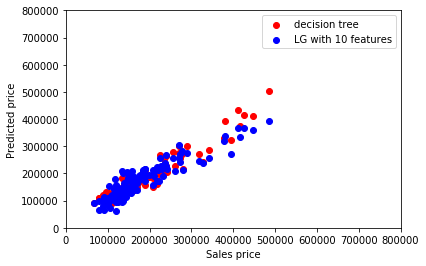

In [132]:
plt.scatter(test.SalePrice,  predictions, color='red',label='decision tree')
m, b = np.polyfit(test.SalePrice,  prediction, 1)
print(f'slope by decision tree = {round(m, 3)}')

plt.scatter(test.SalePrice,  te_predictions10, color = 'blue',label = 'LG with 10 features')
plt.xlabel('Sales price')
plt.ylabel('Predicted price')
plt.xlim(0,800000)
plt.ylim(0,800000)
plt.legend()
m, b = np.polyfit(test.SalePrice,  te_predictions10, 1)
print(f'slope using LG with 10 features = {round(m, 3)}', '\n')

In [133]:
print(f'rmse from linear regression using 10 features = {round(te_rmse10, 3)}')
print(f'rmse from knn using 3 neighbors = {round(rmses_ls[2])}')
print(f'rmse from random forest = {round(rmse_rf)}')
print(f'rmse from decision tree = {round(rmse_dt)}')

rmse from linear regression using 10 features = 33221.487
rmse from knn using 3 neighbors = 41636.0
rmse from random forest = 42789.0
rmse from decision tree = 31313.0


Conclusion: 
    1. Decision tree resulted in the best prediction with the least rmse.
    2. Prediction using linear regression depends on the number of features used.
    3. Prediction using knn depends on the number of neighbors used.